In [1]:
import networkx as nx
import numpy as np
from community import community_louvain
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = [i.strip() for i in open("../data/yeast_graph.txt", 'r').readlines()]

In [3]:
graph = nx.Graph()

In [4]:
for line in file:
    l = line.split('\t')
    graph.add_edge(l[0], l[1], weight = float(l[2]))

In [5]:
graph.number_of_edges()

712

In [6]:
graph.number_of_nodes()

300

In [7]:
nx.number_connected_components(graph)

53

В графе 53 связанные компоненты

In [8]:
print("Размеры связных компонент графа:")
for i, comp in enumerate(nx.connected_components(graph)):
    print(i, len(comp))

Размеры связных компонент графа:
0 4
1 19
2 104
3 3
4 3
5 2
6 2
7 30
8 3
9 3
10 2
11 6
12 7
13 2
14 6
15 10
16 2
17 3
18 4
19 2
20 3
21 2
22 4
23 2
24 3
25 6
26 5
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 3
38 4
39 2
40 2
41 2
42 2
43 2
44 5
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 2


Text(0.5, 1.0, 'Degrees distribution')

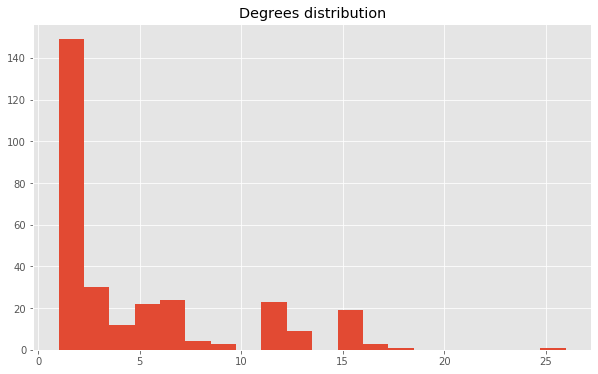

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.hist(dict(graph.degree).values(), bins=20)
plt.title("Degrees distribution")

In [10]:
nx.diameter(graph)

NetworkXError: Found infinite path length because the graph is not connected

Диаметр графа равен бесконечности

In [11]:
biggest_comp = max(nx.connected_component_subgraphs(graph), key=len)

In [12]:
nx.diameter(biggest_comp)

13

Диаметр самой большой связной компоненты графа - 13

In [13]:
#!pip install --user python-louvain

In [14]:
from community import community_louvain

In [15]:
part = community_louvain.best_partition(graph)

/home/lera/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


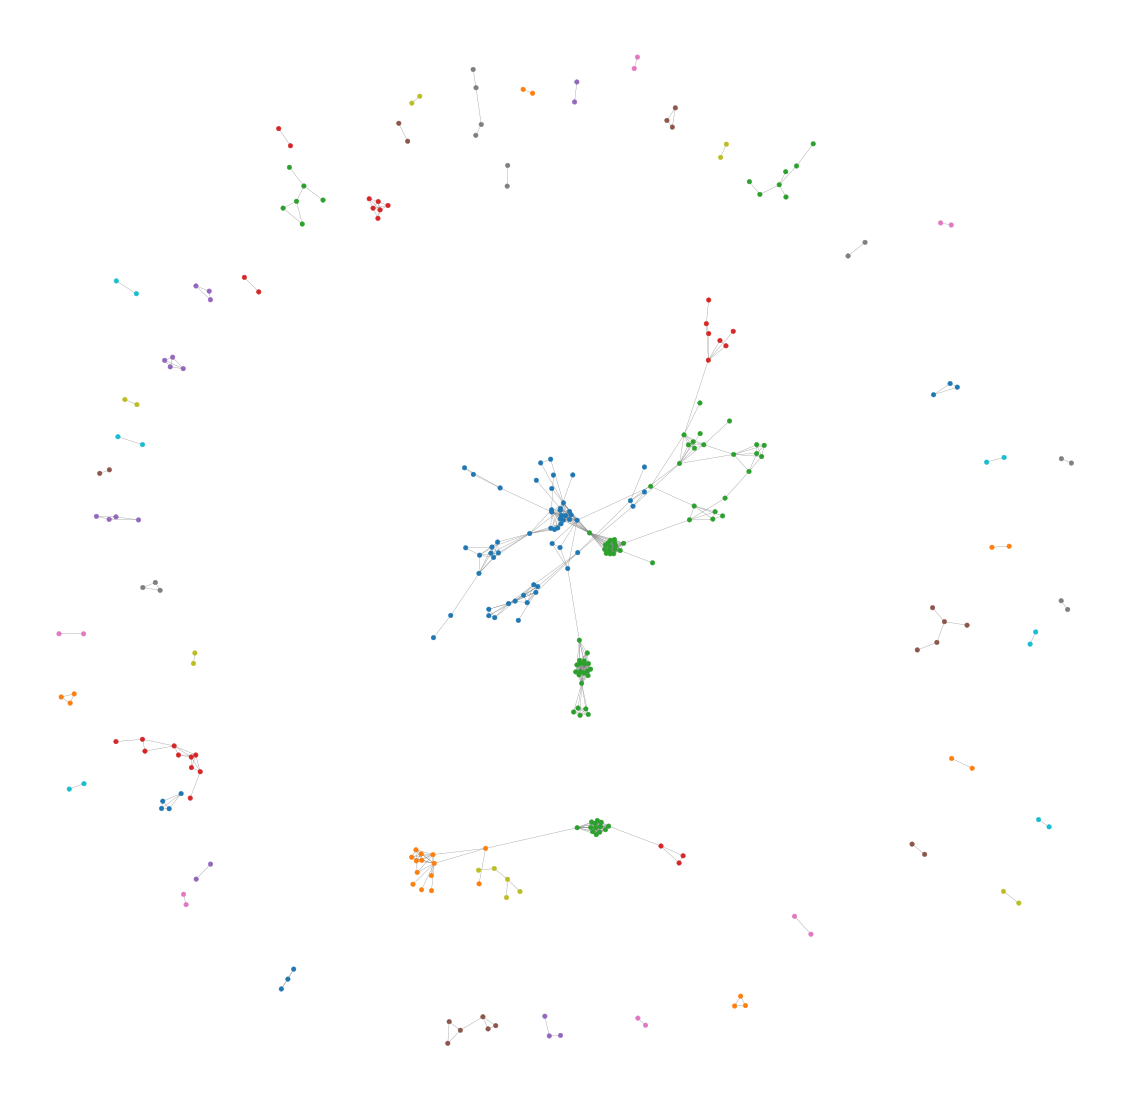

In [16]:
values = [part.get(node) for node in graph.nodes()]
pos = nx.spring_layout(graph)

plt.rcParams['figure.figsize'] = [20, 20]
nx.draw_networkx(graph, pos = pos, 
                 cmap = plt.get_cmap('tab10'), node_color = values,
                 node_size=20, width=0.3, edge_color='grey', with_labels=False)
limits=plt.axis('off') 

In [17]:
{i:list(part.values()).count(i)  for i in set(part.values())} #количество белков в каждой группе

{0: 4,
 1: 19,
 2: 16,
 3: 3,
 4: 21,
 5: 3,
 6: 2,
 7: 2,
 8: 14,
 9: 3,
 10: 3,
 11: 2,
 12: 21,
 13: 13,
 14: 6,
 15: 17,
 16: 7,
 17: 22,
 18: 2,
 19: 6,
 20: 10,
 21: 2,
 22: 7,
 23: 3,
 24: 3,
 25: 4,
 26: 2,
 27: 3,
 28: 2,
 29: 4,
 30: 2,
 31: 3,
 32: 6,
 33: 5,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 38: 2,
 39: 2,
 40: 2,
 41: 2,
 42: 2,
 43: 2,
 44: 3,
 45: 4,
 46: 2,
 47: 2,
 48: 2,
 49: 2,
 50: 2,
 51: 5,
 52: 2,
 53: 2,
 54: 2,
 55: 2,
 56: 2,
 57: 2,
 58: 2,
 59: 2}

In [18]:
len(np.unique([list(part.values()).count(i)  for i in set(part.values())]))

14

(array([31.,  9.,  4.,  2.,  3.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
         1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  2.,  1.]),
 array([ 2.        ,  2.86956522,  3.73913043,  4.60869565,  5.47826087,
         6.34782609,  7.2173913 ,  8.08695652,  8.95652174,  9.82608696,
        10.69565217, 11.56521739, 12.43478261, 13.30434783, 14.17391304,
        15.04347826, 15.91304348, 16.7826087 , 17.65217391, 18.52173913,
        19.39130435, 20.26086957, 21.13043478, 22.        ]),
 <a list of 23 Patch objects>)

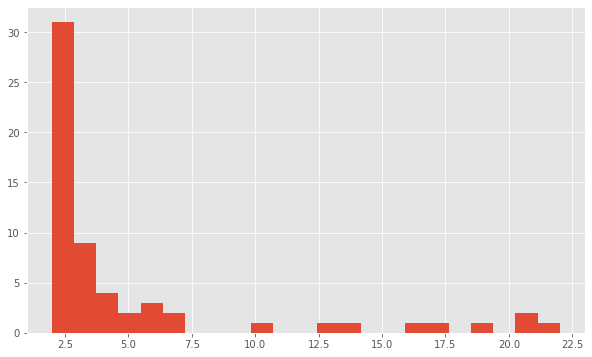

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.hist([list(part.values()).count(i)  for i in set(part.values())],bins = 23)

In [20]:
for v in set(part.values()):
    print(v)
    for key,value in part.items():
        if value == v:
            print(key)

0
YKL166C
YIL033C
YPL203W
YJL164C
1
YCR002C
YHR107C
YJR076C
YLR314C
YDL225W
YDR218C
YOL090W
YDR097C
YCR092C
YAR007C
YNL312W
YJL173C
YGR059W
YNL082W
YDL156W
YER095W
YDR076W
YJL060W
YLR131C
2
YNL290W
YOL094C
YBR087W
YJR068W
YOR217W
YBL035C
YIR008C
YKL045W
YNL102W
YPR175W
YBR278W
YNL262W
YOR144C
YMR078C
YCL042W
YPR167C
3
YOR212W
YJR086W
YHR005C
4
YCL029C
YER016W
YLR045C
YJL042W
YOR272W
YLR175W
YDR016C
YGL061C
YBL034C
YOR265W
YMR138W
YPL241C
YJR089W
YKL049C
YKL089W
YOR058C
YKR037C
YDR060W
YBL032W
YDL117W
YPL032C
5
YPR018W
YBR195C
YML102W
6
YOR132W
YOR069W
7
YGR092W
YIL106W
8
YBR160W
YMR199W
YPL256C
YDL155W
YPR119W
YBR135W
YPR120C
YAL040C
YGR108W
YGR109C
YLR210W
YLR079W
YPL014W
YJL187C
9
YFR015C
YLR258W
YJL137C
10
YJR093C
YPR107C
YAL043C
11
YOR269W
YLR254C
12
YBR126C
YML100W
YBR060C
YHR118C
YLL004W
YNL261W
YPR162C
YDR074W
YMR261C
YLR274W
YGL201C
YML065W
YBL023C
YEL032W
YBR202W
YPR019W
YJL194W
YDL017W
YDR052C
YLR103C
YIL177C
13
YBL084C
YLR127C
YGL240W
YHR166C
YKL022C
YNL172W
YDL008W
YDR118W


In [21]:
big_graph_file = [i.strip().split('\t') for i in open("../data/yeat_full_graph.txt", 'r').readlines()]

In [22]:
big_graph_file[0]

['MEL1', 'YJL092W']

In [23]:
big_graph = nx.Graph()

for line in big_graph_file:
    big_graph.add_edge(line[0], line[1])

In [24]:
big_graph.number_of_nodes()

2018

In [25]:
big_graph.number_of_edges()

2930

In [26]:
big_graph.number_of_selfloops()

225

In [27]:
nx.number_connected_components(big_graph)

185

In [28]:
biggest_component = max(nx.connected_component_subgraphs(big_graph), key=len)
nx.diameter(biggest_component)

14

Text(0.5, 1.0, 'Degrees distribution')

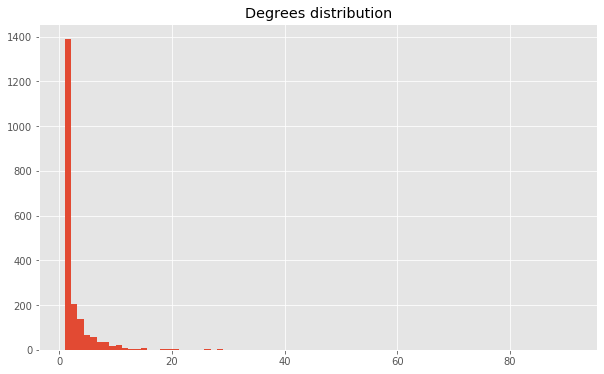

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.hist(dict(big_graph.degree).values(), bins=80)
plt.title("Degrees distribution")

In [30]:
big_partition = community_louvain.best_partition(big_graph)

/home/lera/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


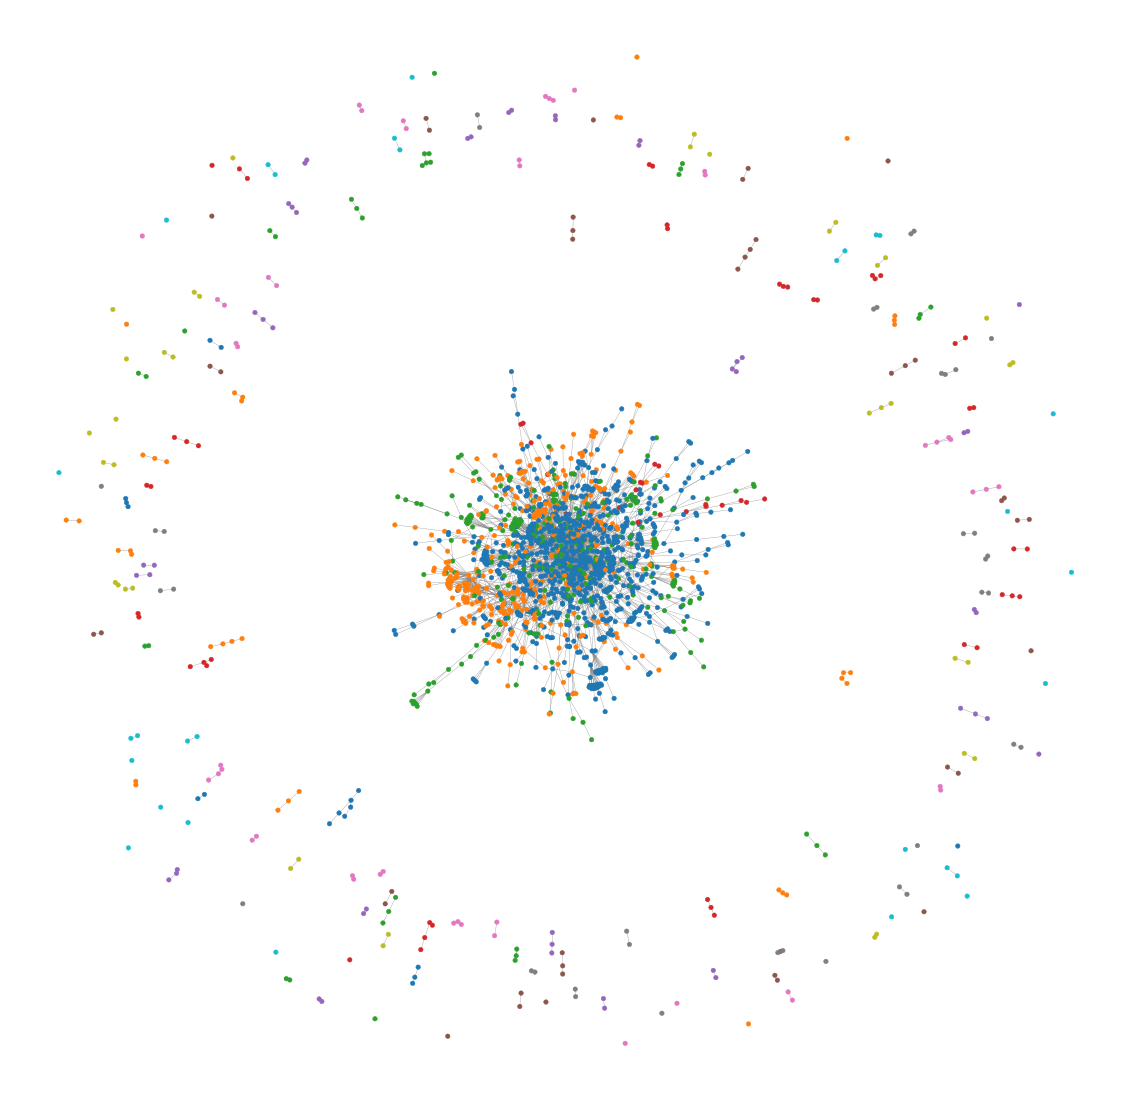

In [31]:
values = [big_partition.get(node) for node in big_graph.nodes()]
pos = nx.spring_layout(big_graph)

plt.rcParams['figure.figsize'] = [20, 20]
nx.draw_networkx(big_graph, pos = pos, 
                 cmap = plt.get_cmap('tab10'), node_color = values,
                 node_size=20, width=0.3, edge_color='grey', with_labels=False)
limits=plt.axis('off') 

Text(0.5, 1.0, 'Group members distribution')

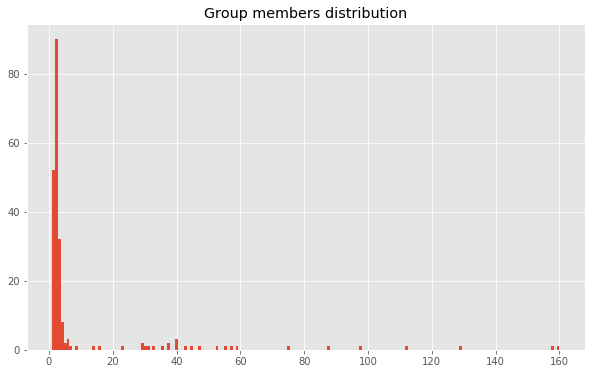

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.hist([list(big_partition.values()).count(i)  for i in set(big_partition.values())], bins = 177)
plt.title("Group members distribution")

Много групп состоящих из одного белка

In [33]:
edge_overlap_nodes = dict()
for edge in big_graph.edges():
    a = edge[0]
    b = edge[1]
    a_neighbours = set(big_graph.neighbors(a)) 
    b_neighbours = set(big_graph.neighbors(b))
    a_neighbours.remove(b)
    b_neighbours.remove(a)
    union = a_neighbours.union(b_neighbours) #вершины соседние для а или b
    intersection = a_neighbours.intersection(b_neighbours) #вершины соседние одновременно для a и b
    if len(union) != 0:
        edge_overlap = len(intersection)/len(union)
    else:
        edge_overlap = None
    edge_overlap_nodes[edge] = edge_overlap

In [34]:
for i,j in edge_overlap_nodes.items():
    if j == None:
        print(i,j)

('YAL005C', 'YBR101C') None
('YAL012W', 'YAL012W') None
('YAL020C', 'YBL071WA') None
('YAR018C', 'YAR018C') None
('YAR035W', 'YER024W') None
('YBL001C', 'YBL001C') None
('YBL060W', 'YOR094W') None
('YBL077W', 'YBL077W') None
('YBR019C', 'YBR019C') None
('YBR038W', 'YPR106W') None
('YBR056W', 'YFR007W') None
('YBR130C', 'YBR130C') None
('YBR153W', 'YBR153W') None
('YBR156C', 'YPL209C') None
('YBR242W', 'YBR242W') None
('YBR253W', 'YMR112C') None
('YBR279W', 'YOR123C') None
('YCL039W', 'YMR135C') None
('YCR005C', 'YCR005C') None
('YCR023C', 'YMR075CA') None
('YCR057C', 'YGR154C') None
('YCR105W', 'YCR105W') None
('YDL045C', 'YGR077C') None
('YDL056W', 'YMR197C') None
('YDL092W', 'YKL122C') None
('YDL101C', 'YPL269W') None
('YDL135C', 'YLR229C') None
('YDL146W', 'YKL070W') None
('YDL149W', 'YLR065C') None
('YDL150W', 'YKR025W') None
('YDL237W', 'YPR148C') None
('YDR001C', 'YLR270W') None
('YDR047W', 'YDR047W') None
('YDR091C', 'YLR192C') None
('YDR092W', 'YGL087C') None
('YDR108W', 'YGR23

In [35]:
for i,j in edge_overlap_nodes.items():
    if j == 0:
        print(i,j)

('MEL1', 'YJL092W') 0.0
('YJL092W', 'YDR078C') 0.0
('YJL092W', 'YDR510W') 0.0
('YJL092W', 'YOR355W') 0.0
('Q0085', 'YCR106W') 0.0
('YCR106W', 'TORF1') 0.0
('YCR106W', 'TORF47') 0.0
('YCR106W', 'YBR134W') 0.0
('YCR106W', 'YDR222W') 0.0
('YCR106W', 'YEL072W') 0.0
('YCR106W', 'YGL247W') 0.0
('YCR106W', 'YGR081C') 0.0
('YCR106W', 'YGR140W') 0.0
('YCR106W', 'YHR130C') 0.0
('YCR106W', 'YJL006C') 0.0
('YCR106W', 'YJL077WB') 0.0
('YCR106W', 'YJL135W') 0.0
('YCR106W', 'YMR060C') 0.0
('YCR106W', 'YMR141C') 0.0
('YCR106W', 'YNL171C') 0.0
('YCR106W', 'YPL034W') 0.0
('YCR106W', 'YPL243W') 0.0
('YCR106W', 'YPL267W') 0.0
('YCR106W', 'YPR046W') 0.0
('TORF19', 'YDR361C') 0.0
('YDR361C', 'YER086W') 0.0
('YDR361C', 'YGL068W') 0.0
('YDR361C', 'YHR022C') 0.0
('YDR361C', 'YJR056C') 0.0
('YDR361C', 'YMR021C') 0.0
('YDR361C', 'YPL125W') 0.0
('YDR361C', 'YPL208W') 0.0
('TORF21', 'YKR048C') 0.0
('YKR048C', 'YCL024W') 0.0
('YKR048C', 'YDL133CA') 0.0
('YKR048C', 'YDL184C') 0.0
('YKR048C', 'YDR002W') 0.0
('YKR048C

('YLR291C', 'YNL314W') 0.0
('YLR291C', 'YNR012W') 0.0
('YLR291C', 'YOL083W') 0.0
('YLR291C', 'YOL130W') 0.0
('YLR291C', 'YOL143C') 0.0
('YLR291C', 'YOR042W') 0.0
('YLR291C', 'YOR095C') 0.0
('YLR291C', 'YOR111W') 0.0
('YLR291C', 'YOR192CA') 0.0
('YLR291C', 'YOR232W') 0.0
('YLR291C', 'YOR284W') 0.0
('YLR291C', 'YOR380W') 0.0
('YLR291C', 'YPL069C') 0.0
('YLR291C', 'YPL124W') 0.0
('YLR291C', 'YPR062W') 0.0
('YMR314W', 'YHL009C') 0.0
('YMR314W', 'YJR074W') 0.0
('YMR314W', 'YKL130C') 0.0
('YMR314W', 'YNL199C') 0.0
('YMR314W', 'YOR380W') 0.0
('YMR314W', 'YPR135W') 0.0
('YPL144W', 'YLR021W') 0.0
('YBL025W', 'YMR270C') 0.0
('YMR270C', 'YGL044C') 0.0
('YBL026W', 'YCR077C') 0.0
('YBL026W', 'YGR158C') 0.0
('YBL026W', 'YLR438CA') 0.0
('YCR077C', 'YDL139C') 0.0
('YCR077C', 'YDL175C') 0.0
('YCR077C', 'YJL124C') 0.0
('YGR158C', 'YDL111C') 0.0
('YLR438CA', 'YBR261C') 0.0
('YLR438CA', 'YER112W') 0.0
('YLR438CA', 'YJR022W') 0.0
('YLR438CA', 'YOR159C') 0.0
('YBL033C', 'YNL105W') 0.0
('YBL033C', 'YPR172W')

('YGR113W', 'YDR034C') 0.0
('YGR113W', 'YGL079W') 0.0
('YKR037C', 'YDR201W') 0.0
('YDR027C', 'YFL029C') 0.0
('YFL029C', 'YPR054W') 0.0
('YDR034C', 'YER043C') 0.0
('YER043C', 'YFL028C') 0.0
('YDR036C', 'YKL142W') 0.0
('YDR036C', 'YLR397C') 0.0
('YKL142W', 'YDR115W') 0.0
('YKL142W', 'YER182W') 0.0
('YKL142W', 'YKL157W') 0.0
('YKL142W', 'YMR165C') 0.0
('YKL142W', 'YMR210W') 0.0
('YKL142W', 'YMR243C') 0.0
('YKL142W', 'YNL063W') 0.0
('YKL142W', 'YNL210W') 0.0
('YKL142W', 'YOL059W') 0.0
('YLR397C', 'YGR203W') 0.0
('YDR044W', 'YDR077W') 0.0
('YDR054C', 'YNL236W') 0.0
('YNL236W', 'YFR033C') 0.0
('YNL236W', 'YGL238W') 0.0
('YNL236W', 'YGR046W') 0.0
('YNL236W', 'YGR117C') 0.0
('YNL236W', 'YJR034W') 0.0
('YNL236W', 'YKL012W') 0.0
('YDR059C', 'YPR093C') 0.0
('YPR093C', 'YDR177W') 0.0
('YPR093C', 'YNL135C') 0.0
('YER095W', 'YPL204W') 0.0
('YDR078C', 'YHL006C') 0.0
('YHL006C', 'YLR046C') 0.0
('YHL006C', 'YLR376C') 0.0
('YHL006C', 'YNL021W') 0.0
('YDR086C', 'YPR071W') 0.0
('YPR071W', 'YDR284C') 0.0
(

In [43]:
k = 0
for i,j in edge_overlap_nodes.items():
    if j == None:
        k+=1
        
print("None edge overlap have -", k, 'edges')

n = 0
for i,j in edge_overlap_nodes.items():
    if j == 0:
        n+=1
        
print("zero edge overlap have -",n, "edges")

None edge overlap have - 135 edges
zero edge overlap have - 2182 edges
